- ### Documents used:
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
    

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model  import SGDClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.preprocessing import normalize
from memory_profiler import memory_usage

import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader


In [4]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


In [5]:
#Get model
model = ModelLoader()
model.set_model(SGDClassifier())

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#Optimization 
param = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
        'max_iter': [1000, 5000, 10000, 20000],
        'tol': [1e-3, 1e-4, 1e-5]}

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)

#Train model with optimal params
model.set_model(SGDClassifier(**model.optimal_params,random_state=1))

c:\Users\Daito\miniconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Daito\miniconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Daito\miniconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Daito\miniconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Daito\miniconda

Score accuracy group:  0.8757763975155279
Score accuracy global:  0.30237154150197626
Memory:  171.74296875 MB
Score accuracy group:  1.0
Score accuracy global:  0.22035573122529645
Memory:  198.79296875 MB
Score accuracy group:  1.0
Score accuracy global:  0.17885375494071146
Memory:  204.7571315940367 MB
Score accuracy group:  1.0
Score accuracy global:  0.14130434782608695
Memory:  210.6484375 MB
Score accuracy group:  1.0
Score accuracy global:  0.12549407114624506
Memory:  216.578125 MB
Score accuracy group:  1.0
Score accuracy global:  0.06422924901185771
Memory:  222.4523640422078 MB
Score accuracy group:  1.0
Score accuracy global:  0.10968379446640317
Memory:  228.54296875 MB
Score accuracy group:  1.0
Score accuracy global:  0.08498023715415019
Memory:  234.54375 MB
Score accuracy group:  1.0
Score accuracy global:  0.09288537549407115
Memory:  240.546875 MB
Score accuracy group:  1.0
Score accuracy global:  0.06521739130434782
Memory:  246.39453125 MB
Score accuracy group:  

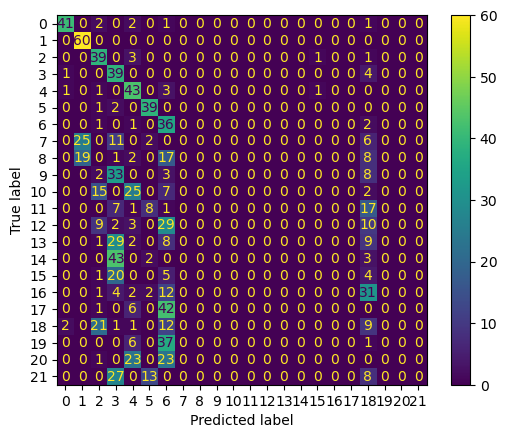

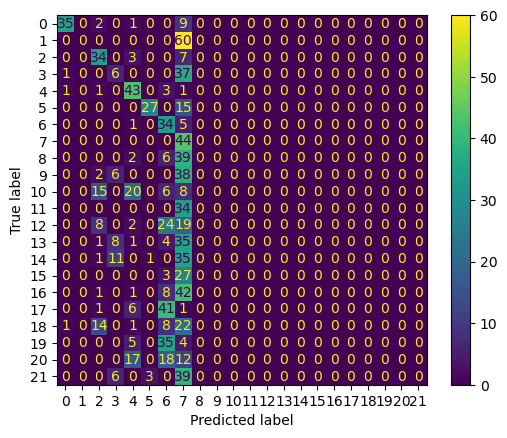

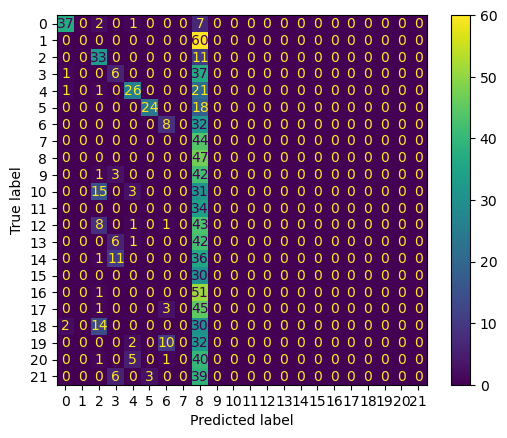

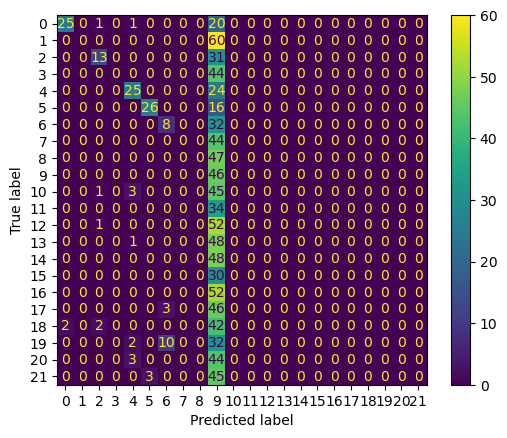

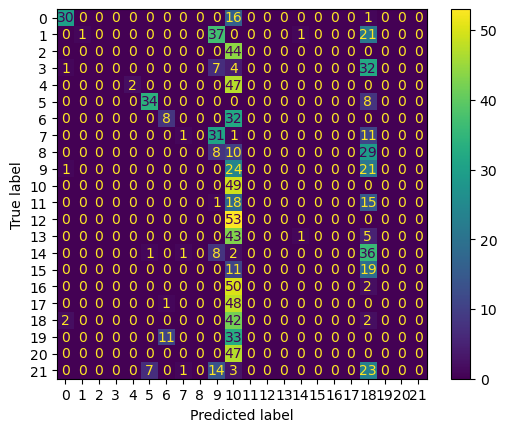

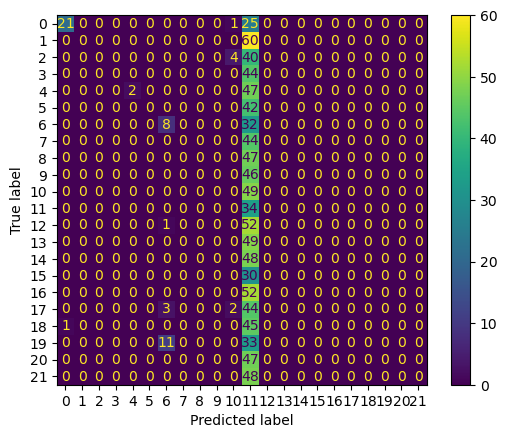

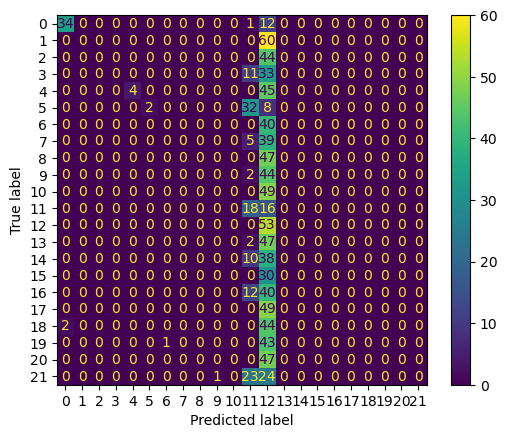

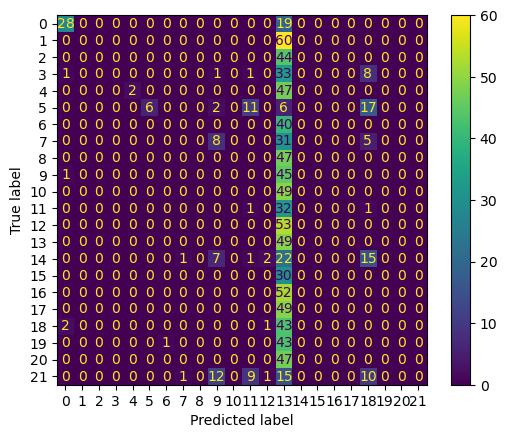

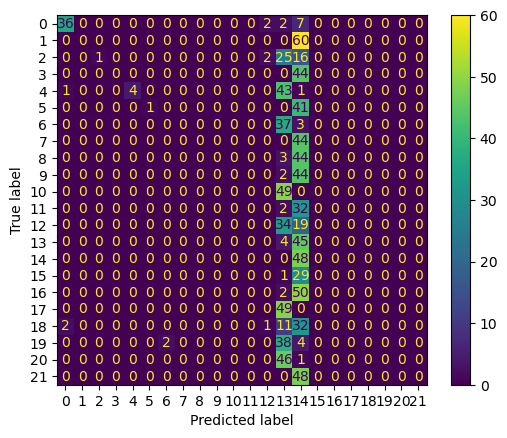

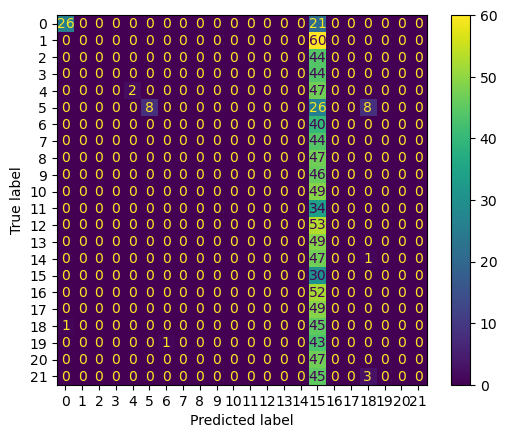

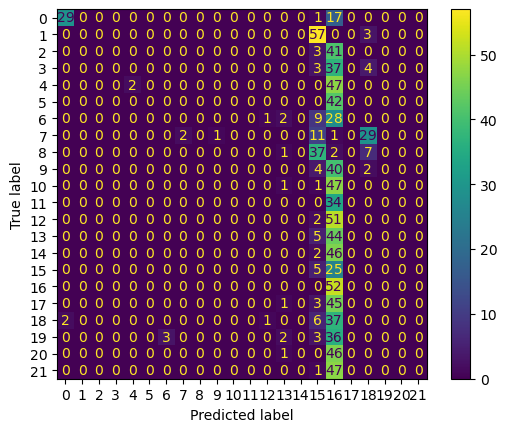

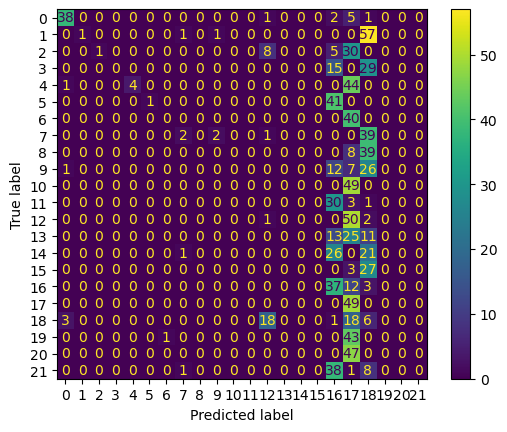

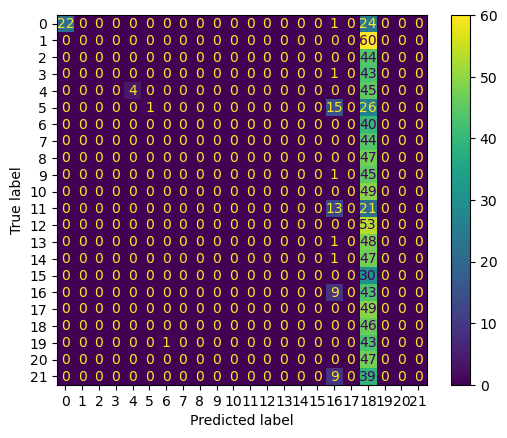

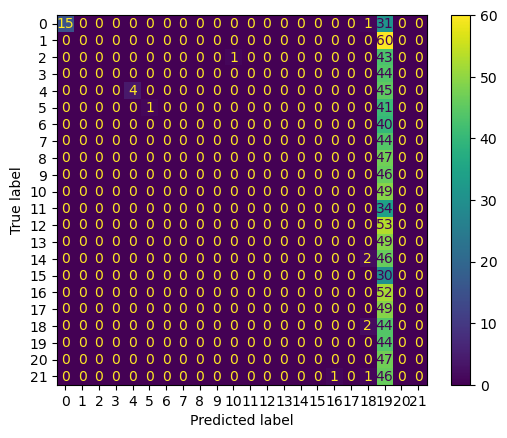

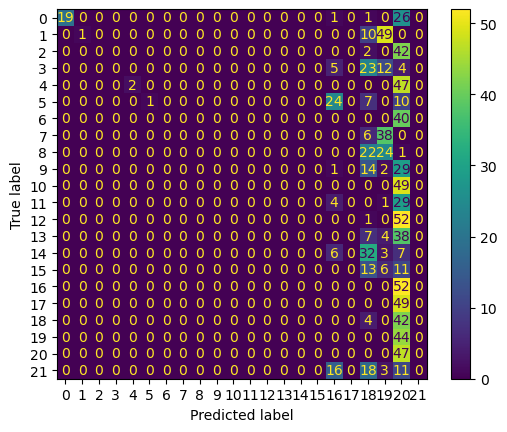

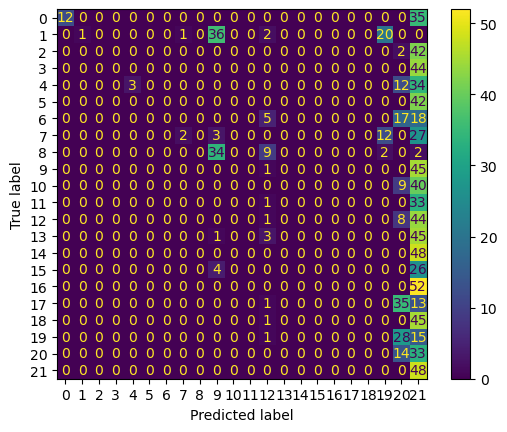

In [6]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7],2:[8],3:[9],4:[10],5:[11],6:[12],7:[13],8:[14],9:[15],10:[16],
                  11:[17],12:[18],13:[19],14:[20],15:[21],16:[22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group)
memory_values = []

#Train model
for X_train,y_train,X_test,y_test in (zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    
    print("Score accuracy group: ",model.score(X_test,y_test))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

Score accuracy batch:  0.5296442687747036
Score accuracy global:  0.5316205533596838
Memory:  319.58203125 MB
Score accuracy batch:  0.5592885375494071
Score accuracy global:  0.549407114624506
Memory:  282.46875 MB
Score accuracy batch:  0.5335968379446641
Score accuracy global:  0.5602766798418972
Memory:  283.83203125 MB
Score accuracy batch:  0.5316205533596838
Score accuracy global:  0.5553359683794467
Memory:  285.59765625 MB
Score accuracy batch:  0.5138339920948617
Score accuracy global:  0.5405138339920948
Memory:  287.06640625 MB
Score accuracy batch:  0.5079051383399209
Score accuracy global:  0.5721343873517787
Memory:  288.82421875 MB
Score accuracy batch:  0.5
Score accuracy global:  0.575098814229249
Memory:  290.25279017857144 MB
Score accuracy batch:  0.4308300395256917
Score accuracy global:  0.5741106719367589
Memory:  292.0143229166667 MB
Score accuracy batch:  0.4743083003952569
Score accuracy global:  0.6037549407114624
Memory:  293.5963541666667 MB
Score accuracy

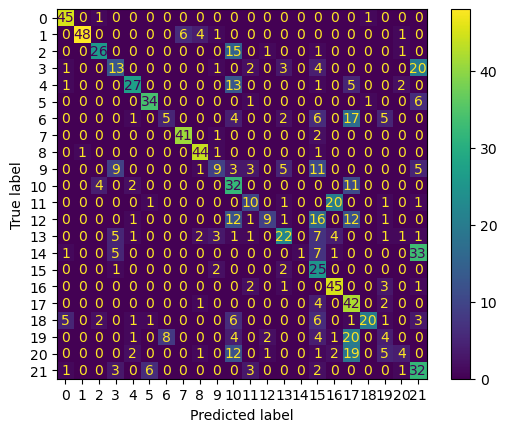

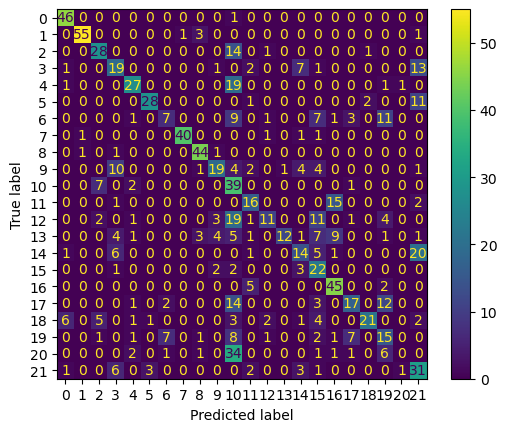

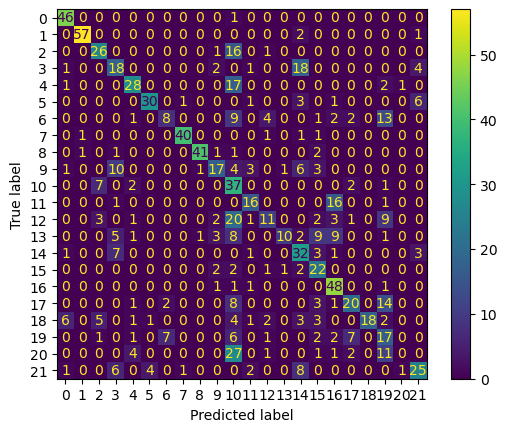

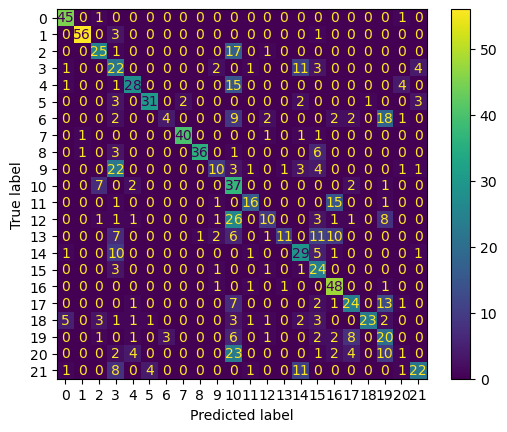

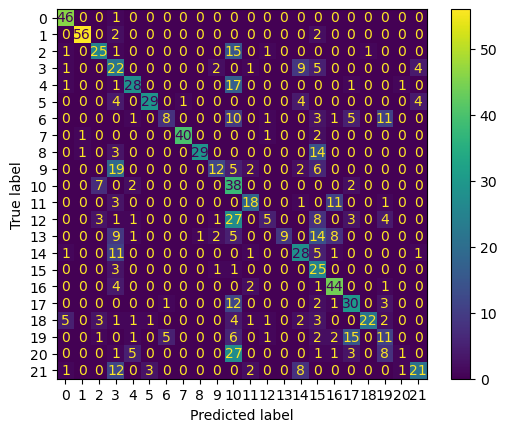

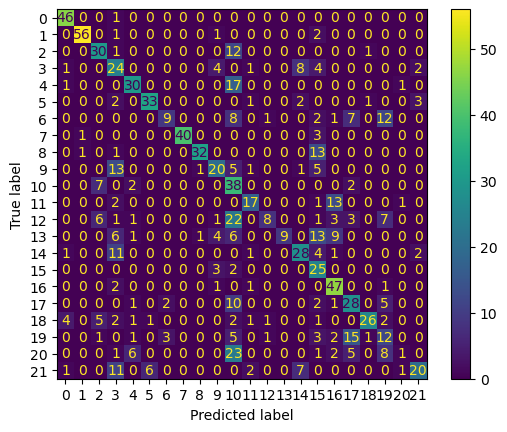

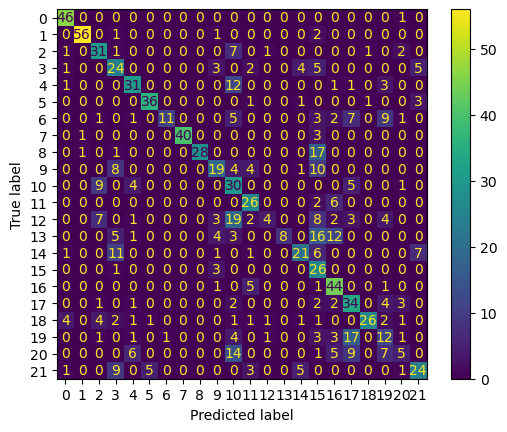

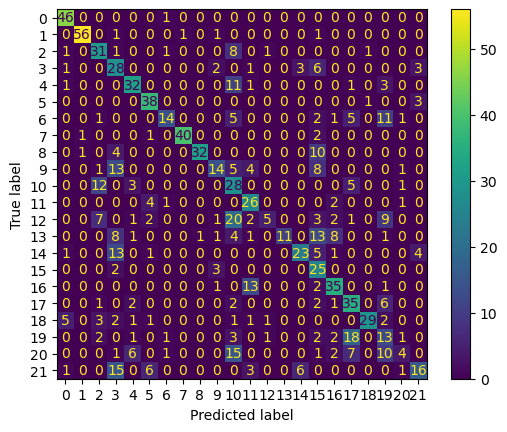

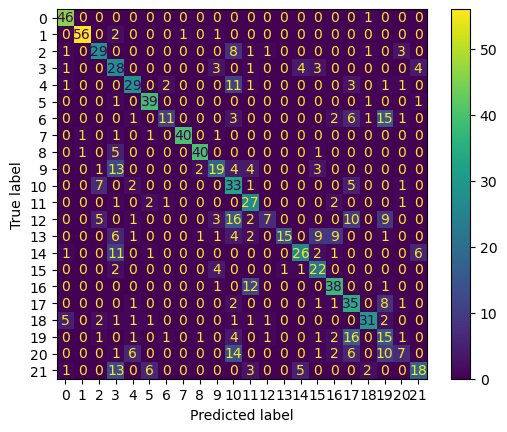

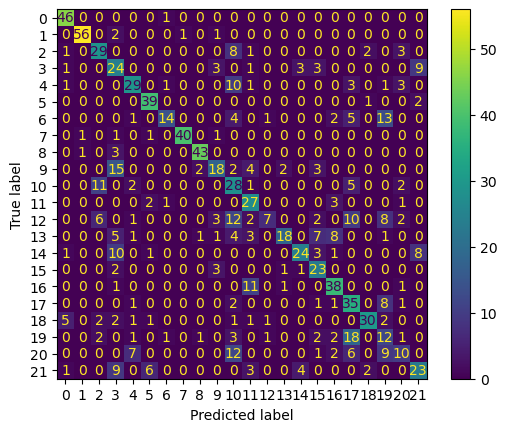

In [7]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print("Score accuracy batch: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")